## Splitting touching objects
A common use-case for the watershed algorithm is splitting touching objects. In this notebook we will split objects in binary images that have a roundish shape and touch each other. 

In [1]:
from skimage.io import imread
import napari_segment_blobs_and_things_with_membranes as nsbatwm
import napari_simpleitk_image_processing as nsitk
import stackview

Starting point for this is a binary image, e.g. made using [thresholding](image-segmentation:thresholding).

StackViewNDArray([[ 19,  29,  44, ...,  88, 115, 113],
                  [ 19,  29,  55, ...,  87, 101, 112],
                  [ 25,  36,  61, ...,  90,  90, 106],
                  ...,
                  [ 20,  21,  20, ...,  57,  33,  40],
                  [ 22,  25,  25, ...,  41,  34,  40],
                  [ 20,  25,  18, ...,  41,  35,  39]], dtype=uint8)
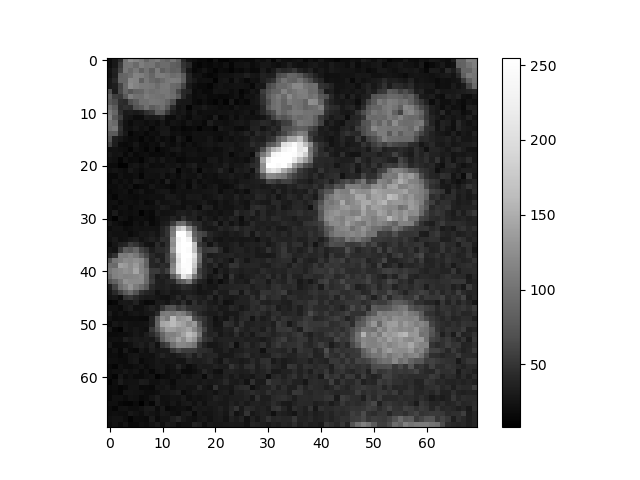
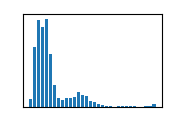

In [2]:
nuclei = imread('../../data/mitosis_mod.tif')

stackview.insight(nuclei)

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


StackViewNDArray([[False, False, False, ...,  True,  True,  True],
                  [False, False, False, ...,  True,  True,  True],
                  [False, False, False, ...,  True,  True,  True],
                  ...,
                  [False, False, False, ..., False, False, False],
                  [False, False, False, ..., False, False, False],
                  [False, False, False, ..., False, False, False]])
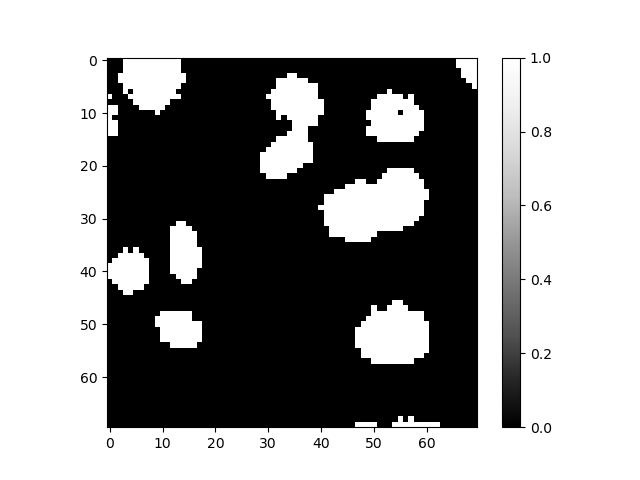
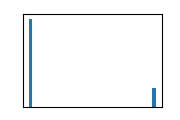

In [3]:
binary = nsbatwm.threshold_otsu(nuclei).astype(bool)

binary

We can then split the touching object by only taking the binary image into account. The underlying algorithm aims to produce similar results to [ImageJ's binary watershed algorithm](https://imagej.nih.gov/ij/docs/menus/process.html#watershed) and the implementation here also works in 3D.

StackViewNDArray([[False, False, False, ...,  True,  True,  True],
                  [False, False, False, ...,  True,  True,  True],
                  [False, False, False, ...,  True,  True,  True],
                  ...,
                  [False, False, False, ..., False, False, False],
                  [False, False, False, ..., False, False, False],
                  [False, False, False, ..., False, False, False]])
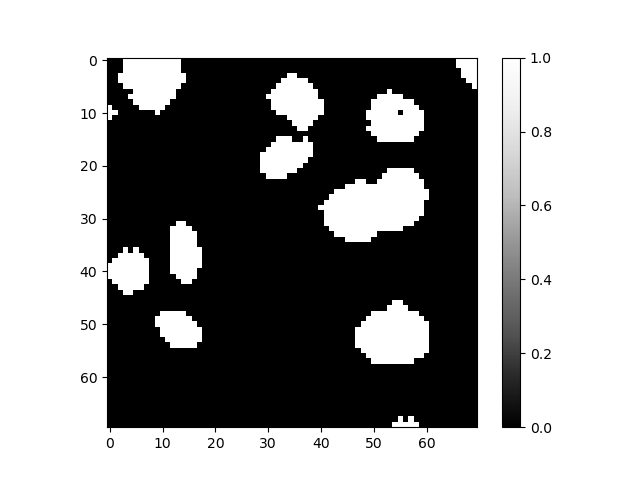
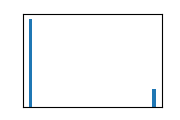

In [4]:
split_objects = nsbatwm.split_touching_objects(binary)
split_objects

The `split_touching_objects` function also has a parameter `sigma` that allows controlling how aggressive objects should be split. To make more splits, enter a smaller number than 3.5 which is the default.

StackViewNDArray([[False, False, False, ...,  True,  True,  True],
                  [False, False, False, ...,  True,  True,  True],
                  [False, False, False, ...,  True,  True,  True],
                  ...,
                  [False, False, False, ..., False, False, False],
                  [False, False, False, ..., False, False, False],
                  [False, False, False, ..., False, False, False]])
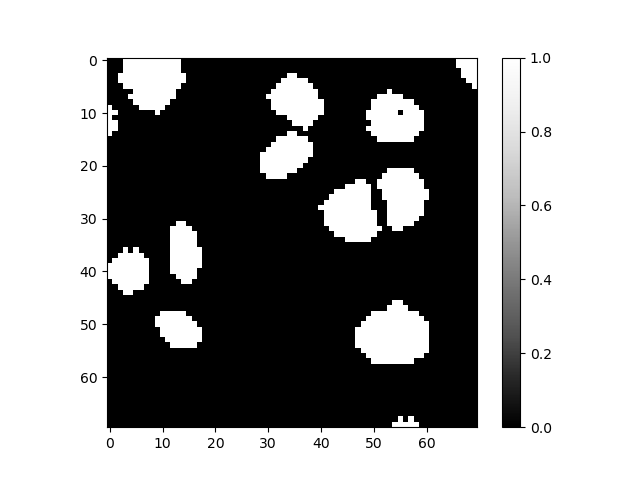
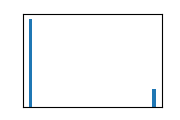

In [5]:
split_objects2 = nsbatwm.split_touching_objects(binary, sigma=2)
split_objects2

It is also possible to retrieve a label image as result. Note that in this case, the black line/gap between objects will not be present.

StackViewNDArray([[0, 0, 0, ..., 2, 2, 2],
                  [0, 0, 0, ..., 2, 2, 2],
                  [0, 0, 0, ..., 2, 2, 2],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
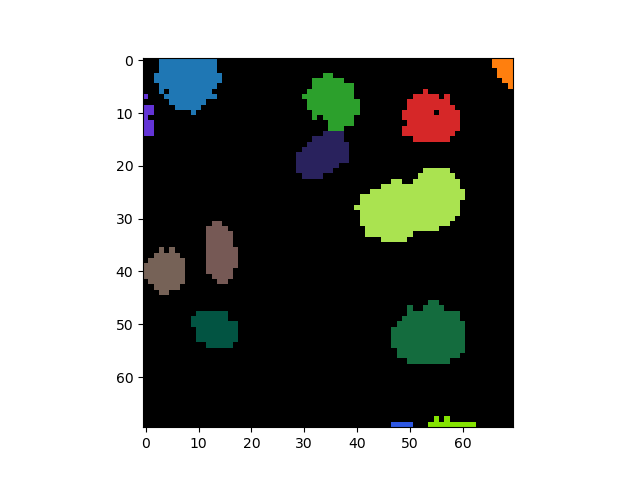

In [6]:
touching_labels = nsitk.touching_objects_labeling(binary)
touching_labels